# Logistic Regression
*   Author: Sanjay S Rao
*   LinkedIn: https://www.linkedin.com/in/sanjay-s-rao04/
*   e-mail - sanjay.s.rao04@gmail.com

## Problem statement:
__Catherine Russel__ the unisex chief is very curious about analyzing the position of women in this modern era. She has an intuition that many biases exist when it comes to women's economic status. Find out whether her assumption is correct or not.
In order to understand the existence of bias, take the help of `adult` dataset from __UCI repository__ and come up with your conclusions. The 2022 Women's Day theme is `Breaking the Bias`. Through your research find out at what different levels of bias exists and what should be the solution to overcome it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
%matplotlib inline

### Dataset Description:
We will be working on the `Adults` Data Set, which can be found at the __UCI Website__. In this problem the _goal_ is to _predict whether a person income is higher or lower than $50k/year_ based on their attributes, which indicates that we will be able to use the logistic regression algorithm. The data set has __48,842 observations__ and __14 features__.

#### Features:
- __age__: continuous.
- __workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- __fnlwgt__ (Final weight of how much of the population it represents): continuous.
- __education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool.
- __education-num__: continuous.
- __marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- __occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-- inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- __relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- __race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- __gender__: Female, Male.
- __capital-gain__: continuous.
- __capital-loss__: continuous.
- __hours-per-week__: continuous.
- __native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- __salary__: >50K,<=50K

In [3]:
df = pd.read_csv('./Dataset/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [5]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [6]:
# Dealing with missing data

In [7]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
df.shape

(48842, 15)

In [8]:
df['workclass'].value_counts(dropna = False)

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [9]:
df['occupation'].value_counts(dropna = False)

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [10]:
# Data cleaning -  Replace ? with NaN value in the dataset
df['native-country'] = df['native-country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

#impute missing values with mode
df["workclass"].replace(np.NaN, "Private", inplace=True)
df["occupation"].replace(np.NaN, "Missing", inplace=True)
df["native-country"].replace(np.NaN, "United-States", inplace=True)

# df.dropna(how='any',inplace=True) #remove the rows containing missing values

### Check for duplicate data

In [11]:
df.duplicated().sum()

52

In [12]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Missing,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
df.shape

(48842, 15)

### Data pre-processing

In [14]:
df['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

We shall assign `0 - United States` and `1 - all other countries` since 85% of the people are from __United States.__

In [15]:
df.loc[df['native-country'] != 'United-States', 'native-country'] = 0
df.loc[df['native-country'] == 'United-States', 'native-country'] = 1

In [16]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [17]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
df['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

df['education'].value_counts()

HS-grad              20398
Some-college         10878
Bachelors             8025
Masters               2657
Assoc-voc             2061
elementary_school     1711
Assoc-acdm            1601
Prof-school            834
Doctorate              594
Preschool               83
Name: education, dtype: int64

In [18]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
df['marital-status'].replace(to_replace = married ,value = 'Married',inplace = True)
df['marital-status'].replace(to_replace = separated,value = 'Separated',inplace = True)

df['marital-status'].value_counts()

Married          23044
Never-married    16117
Separated         8163
Widowed           1518
Name: marital-status, dtype: int64

In [19]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

df['workclass'].value_counts()

Private           36705
Govt_employees     6549
Self_employed      5557
Without-pay          21
Never-worked         10
Name: workclass, dtype: int64

In [20]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,4,7,1,6,3,2,1,0,0,40,1,0
1,38,2,89814,4,9,0,4,0,4,1,0,0,50,1,0
2,28,0,336951,0,12,0,11,0,4,1,0,0,40,1,1
3,44,2,160323,8,10,0,6,0,2,1,7688,0,40,1,1
4,18,2,103497,8,10,1,7,3,4,0,0,0,30,1,0


In [21]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [22]:
df['income']= label_encoder.fit_transform(df['income'])
df['gender']= label_encoder.fit_transform(df['gender'])
df['race']= label_encoder.fit_transform(df['race'])
df['workclass']= label_encoder.fit_transform(df['workclass'])
df['marital-status']= label_encoder.fit_transform(df['marital-status'])
df['occupation']= label_encoder.fit_transform(df['occupation'])
df['relationship']= label_encoder.fit_transform(df['relationship'])
df['education']= label_encoder.fit_transform(df['education'])


In [23]:
# drop rows with age 90
print("Number of observation before removing:",df.shape)
index_age = df[df['age'] == 90].index
df.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",df.shape)

Number of observation before removing: (48842, 15)
Number of observation after removing: (48787, 15)


In [24]:
print("Number of observation before removing:",df.shape)
index_gain = df[df['capital-gain'] == 99999].index
df.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",df.shape)

Number of observation before removing: (48787, 15)
Number of observation after removing: (48543, 15)


In [25]:
# create a copy of the dataframe for pivoting
data = df.copy()
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,4,7,1,6,3,2,1,0,0,40,1,0
1,38,2,89814,4,9,0,4,0,4,1,0,0,50,1,0
2,28,0,336951,0,12,0,11,0,4,1,0,0,40,1,1
3,44,2,160323,8,10,0,6,0,2,1,7688,0,40,1,1
4,18,2,103497,8,10,1,7,3,4,0,0,0,30,1,0


In [26]:
# drop 'educational-num','capital-gain','capital-loss' columns
df = df.drop(['educational-num','relationship'],axis=1)

## Data visualization

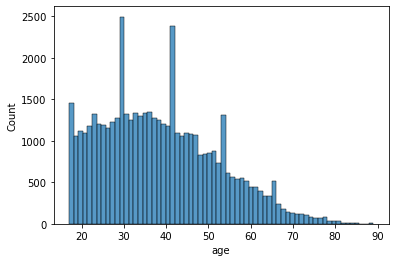

In [27]:
sns.histplot(df['age'])

In [28]:
# Total Number of Persons Having Age Between 17 To 48 (Inclusive) Using Between Method
df['age'].between(17,48).sum()

37180

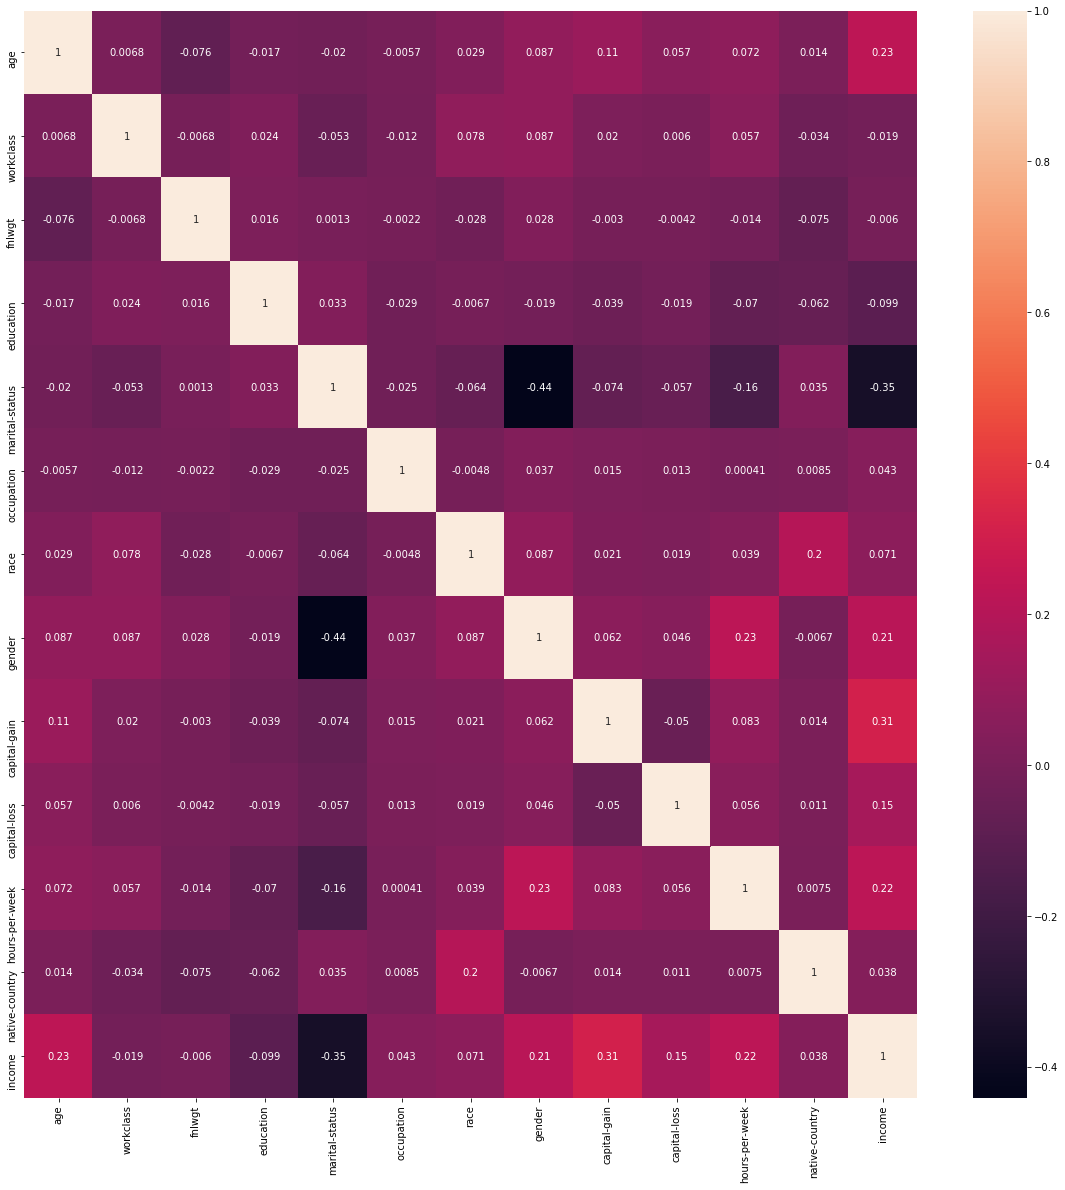

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

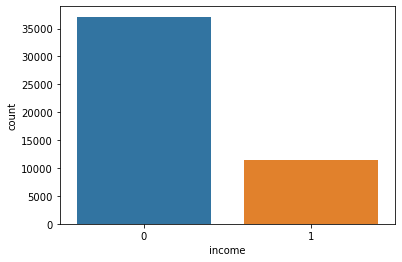

0    37113
1    11430
Name: income, dtype: int64

In [30]:
plt.title = "Income class distribution"
sns.countplot(x="income", data= df)
plt.show()
df["income"].value_counts()

There is strong imbalance in the target value counts and it will affect the model adversely. In order to solve this issue, we will oversample the dataset.

### Seperating the dataset into Dependent and Target variables

In [31]:
y = df['income']
X = df.drop(['income'], axis = 1)

In [32]:
X.head()

,age,workclass,fnlwgt,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,226802,4,1,6,2,1,0,0,40,1
1,38,2,89814,4,0,4,4,1,0,0,50,1
2,28,0,336951,0,0,11,4,1,0,0,40,1
3,44,2,160323,8,0,6,2,1,7688,0,40,1
4,18,2,103497,8,1,7,4,0,0,0,30,1


In [33]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

### Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Logistic Regression 

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Create an instance and fit the model 
lr_model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
lr_model.fit(X_train, y_train)

# Making predictions
y_pred = lr_model.predict(X_test)

# Accuracy
print(f"Accuracy = {lr_model.score(X_test, y_test)}")

Accuracy = 0.7964774951076321


In [63]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7192,  232],
       [1744,  541]], dtype=int64)

### Confusion matrix visualized:

Text(0.5, 257.44, 'Predicted label')

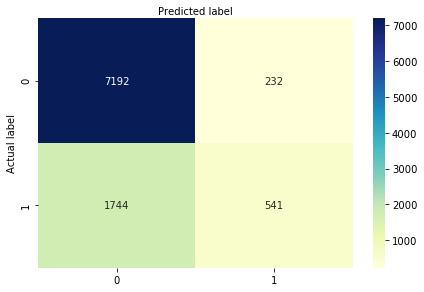

In [64]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
#plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.7964774951076321
Precision: 0.6998706338939198
Recall: 0.23676148796498905


In [66]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7424
           1       0.70      0.24      0.35      2285

    accuracy                           0.80      9709
   macro avg       0.75      0.60      0.62      9709
weighted avg       0.78      0.80      0.76      9709



The __accuracy__ comes out to be __80%__ but did you notice something strange ?
The __recall__ of the __minority class__ in very less. It proves that the model is more _biased towards majority class_. So, it proves that this is not the best model.
Now, we will apply different imbalanced data handling technique and see the accuracy and recall results.

### Re-sampling
The main idea of sampling classes is to either increasing the samples of the minority class or decreasing the samples of the majority class. This is done in order to obtain a fair balance in the number of instances for both the classes.

A widely adopted technique for dealing with highly unbalanced datasets is called __resampling.__ It consists of removing samples from the majority class (`under-sampling`) and / or adding more examples from the minority class (`over-sampling`).

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause __overfitting.__ In under-sampling, the simplest technique involves removing random records from the majority class, which can cause __loss of information.__

In [67]:
def _oversample_positives(df, target):
    """ Oversample the minority classes to match
    the majority class.
    
    :param df: pandas dataframe - input df.
    :param target: string - classification target column.

    :return: pandas datframe - oversampled version
    """

    class_count = df[target].value_counts()

    print("Before oversampling:\n %s" % class_count)
    
    for i in range(1,len(class_count)):
        df_i = df[df[target] == i]
        oversampling_factor_i = class_count[0] / float(class_count[i])
        print(len(df_i))
        print("Oversampling factor for class %i: %s" %(i, str(oversampling_factor_i)))
    
        # Integer part of oversampling
        df = df.append(
            [df_i] * int(math.floor(oversampling_factor_i) - 1),
            ignore_index=False)
        
        # Float part of oversampling
        df = df.append(
            [df_i.sample(frac=oversampling_factor_i % 1)],
            ignore_index=False)
    
    print("After oversampling:\n %s" % df[target].value_counts())
    print("Shape after oversampling: %s" % str(df.shape))

    return df

In [68]:
df_oversampled = _oversample_positives(df, 'income')

Before oversampling:
 0    37113
1    11430
Name: income, dtype: int64
11430
Oversampling factor for class 1: 3.246981627296588
After oversampling:
 0    37113
1    37113
Name: income, dtype: int64
Shape after oversampling: (74226, 13)


__NOTE:__ Oversampling the data is not the best choice while working with numerical data and classification/regression, as it simply duplicates the available data adn by doing so, the model performs poorly.

In [71]:
# X_ovr : X_oversampled || y_ovr : y_oversampled
y_ovr = df_oversampled['income']
X_ovr = df_oversampled.drop(['income'], axis = 1)

#train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_ovr, y_ovr, test_size = 0.2, random_state = 0)

#Logistic Regression Model
# Create an instance and fit the model 
lr_model1 = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
lr_model1.fit(X_train1, y_train1)

# Making predictions
y_pred1 = lr_model1.predict(X_test1)

# Accuracy
print(f"Accuracy = {lr_model1.score(X_test1, y_test1)}")

Accuracy = 0.7775831873905429


In [72]:
# print classification report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      7405
           1       0.75      0.83      0.79      7441

    accuracy                           0.78     14846
   macro avg       0.78      0.78      0.78     14846
weighted avg       0.78      0.78      0.78     14846



### SMOTE (Synthetic Minority Oversampling Technique) – Oversampling
__SMOTE (synthetic minority oversampling technique)__ is one of the most commonly used oversampling methods to solve the imbalance problem.

It aims to balance class distribution by randomly increasing minority class examples by replicating them.
SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.
More Deep Insights of how SMOTE Algorithm work !

__Step 1:__ Setting the minority class set A, for each $x \in A$, the k-nearest neighbors of x are obtained by calculating the Euclidean distance between x and every other sample in set A.

__Step 2:__ The sampling rate N is set according to the imbalanced proportion. For each $x \in A$, N examples (i.e x1, x2, …xn) are randomly selected from its k-nearest neighbors, and they construct the set $A_1$ .

__Step 3:__ For each example $x_k \in A_1$ (k=1, 2, 3…N), the following formula is used to generate a new example:
$x' = x + rand(0, 1) * \mid x - x_k \mid$
in which rand(0, 1) represents the random number between 0 and 1.

Ref: [GeeksForGeeks](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)

In [73]:
# !pip install imblearn

In [74]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
from sklearn.metrics import DistanceMetric
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 9145
Before OverSampling, counts of label '0': 29689 

After OverSampling, the shape of X_train: (59378, 12)
After OverSampling, the shape of y_train: (59378,) 

After OverSampling, counts of label '1': 29689
After OverSampling, counts of label '0': 29689


In [75]:
# Create an instance and fit the model 
lr_model2 = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
lr_model2.fit(X_train_res, y_train_res)

# Making predictions
y_pred2 = lr_model2.predict(X_test)

# Accuracy
print(f"Accuracy = {lr_model2.score(X_test, y_test)}")

Accuracy = 0.755175610258523


In [76]:
# print classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.75      0.82      7424
           1       0.49      0.78      0.60      2285

    accuracy                           0.76      9709
   macro avg       0.70      0.76      0.71      9709
weighted avg       0.82      0.76      0.77      9709



__Inference:__ 

## Pivoting

In [49]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [50]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,4,7,1,6,3,2,1,0,0,40,1,0
1,38,2,89814,4,9,0,4,0,4,1,0,0,50,1,0
2,28,0,336951,0,12,0,11,0,4,1,0,0,40,1,1
3,44,2,160323,8,10,0,6,0,2,1,7688,0,40,1,1
4,18,2,103497,8,10,1,7,3,4,0,0,0,30,1,0


In [51]:
data['gender'].value_counts()

1    32404
0    16139
Name: gender, dtype: int64

In [52]:
data = data.drop(['educational-num','relationship'],axis=1)

In [53]:
table = pd.pivot_table(data,index=["gender"],values=['income'], aggfunc=np.sum)
table

,income
gender,
0,1730
1,9700


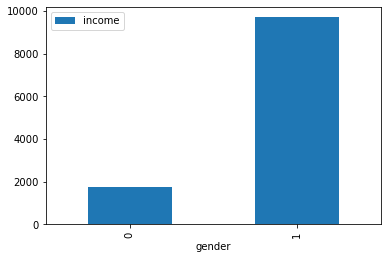

In [54]:
table.plot(kind='bar');

### The gender and race distribution against income >50k

In [55]:
table = pd.pivot_table(data,index=["gender","race"],values=['income'], aggfunc=np.sum)
table

income
gender race        
0      0         15
       1         67
       2        126
       3         10
       4       1512
1      0         40
       1        327
       2        429
       3         37
       4       8867

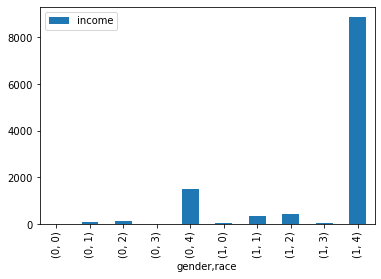

In [56]:
table.plot(kind='bar');

### The gender and workclass distribution against income >50k individuals

In [57]:
table = pd.pivot_table(data,index=["gender","workclass"],values=['income'], aggfunc=np.sum)
table

income
gender workclass        
0      0             405
       1               0
       2            1145
       3             179
       4               1
1      0            1598
       1               0
       2            6366
       3            1735
       4               1

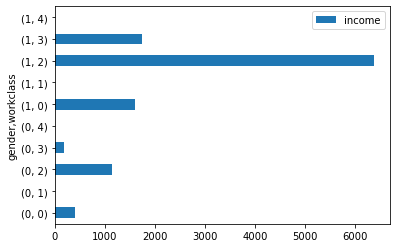

In [58]:
table.plot(kind='barh');

### The gender and workclass distribution against average age

In [59]:
table = pd.pivot_table(data = data[['gender','age','workclass','education']],index=["workclass","gender"])
table

age  education
workclass gender                      
0         0       40.497974   4.421799
          1       41.567840   4.365920
1         0       21.666667   4.000000
          1       19.142857   5.857143
2         0       35.674669   4.692518
          1       37.809291   4.573183
3         0       44.239471   4.488568
          1       45.568492   4.550963
4         0       52.857143   5.857143
          1       44.500000   4.071429

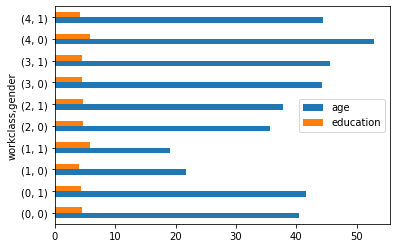

In [60]:
table.plot(kind='barh')